### Bitcoin Price Analysis
Source for data: https://min-api.cryptocompare.com/

<img src="https://thewarden.io/images/qr_code_btc.png" style="float: right;" height=150 width=150>

### If you'd like to contribute

#### **Bitcoin public address**</p>
**`bc1qlwelaz6jsupjrfpuk0327uazxrregvupse99rz`**
   
[Or use Lightning through Tippin.me](https://tippin.me/@alphaazeta)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import urllib
import requests

# Chart libraries + settings
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
pd.options.mode.chained_assignment = None  # default='warn' - disable some pandas warnings

In [2]:
# Load Bitcoin Prices into a dataframe
# Ticker is customizable
ticker = "BTC"
# Cryptocompare URL and fiels
base_url = 'https://min-api.cryptocompare.com/data/histoday'
ticker_field = 'fsym'
field_dict = {'tsym': 'USD','allData': 'true'}
# Convert the field dict into a url encoded string
url_args = "&" + urllib.parse.urlencode(field_dict)
ticker = ticker.upper()
globalURL = (base_url + "?" + ticker_field + "=" + ticker + url_args)


In [3]:
# Request the data
resp = requests.get(url=globalURL)
data = resp.json()
data["Response"]

'Success'

In [4]:
# Parse the JSON into a Pandas DataFrame
try:
    df = pd.DataFrame.from_dict(data['Data'])
    df = df.rename(columns={'time': 'date'})
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.set_index('date', inplace=True)
    df_save = df[['close', 'open', 'high', 'low']]
except Exception as e:
    self.errors.append(e)
    df_save = None

In [52]:
# Include percentage change and other columns 
df = df_save
df['change'] = df['close'].pct_change()
# Include Vol calculation
vol_days = 30
# Calculate Vol on a rolling vol_days basis and annualize the points
df['vol'] = (df["change"].rolling(vol_days).std() * (365 ** 0.5) * 100)

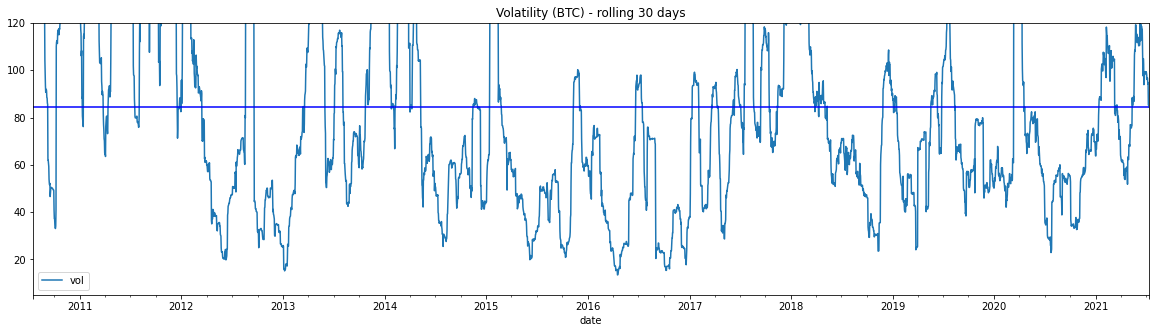

In [53]:
df[['vol']].plot(
                    kind='line', 
                    figsize=(20,5), 
                    title='Volatility ('+ticker.upper()+') - rolling '+str(vol_days)+' days')

axes = plt.gca()
axes.set_ylim([5,120])
plt.axhline(df['vol'][-1], color="blue")
plt.show()

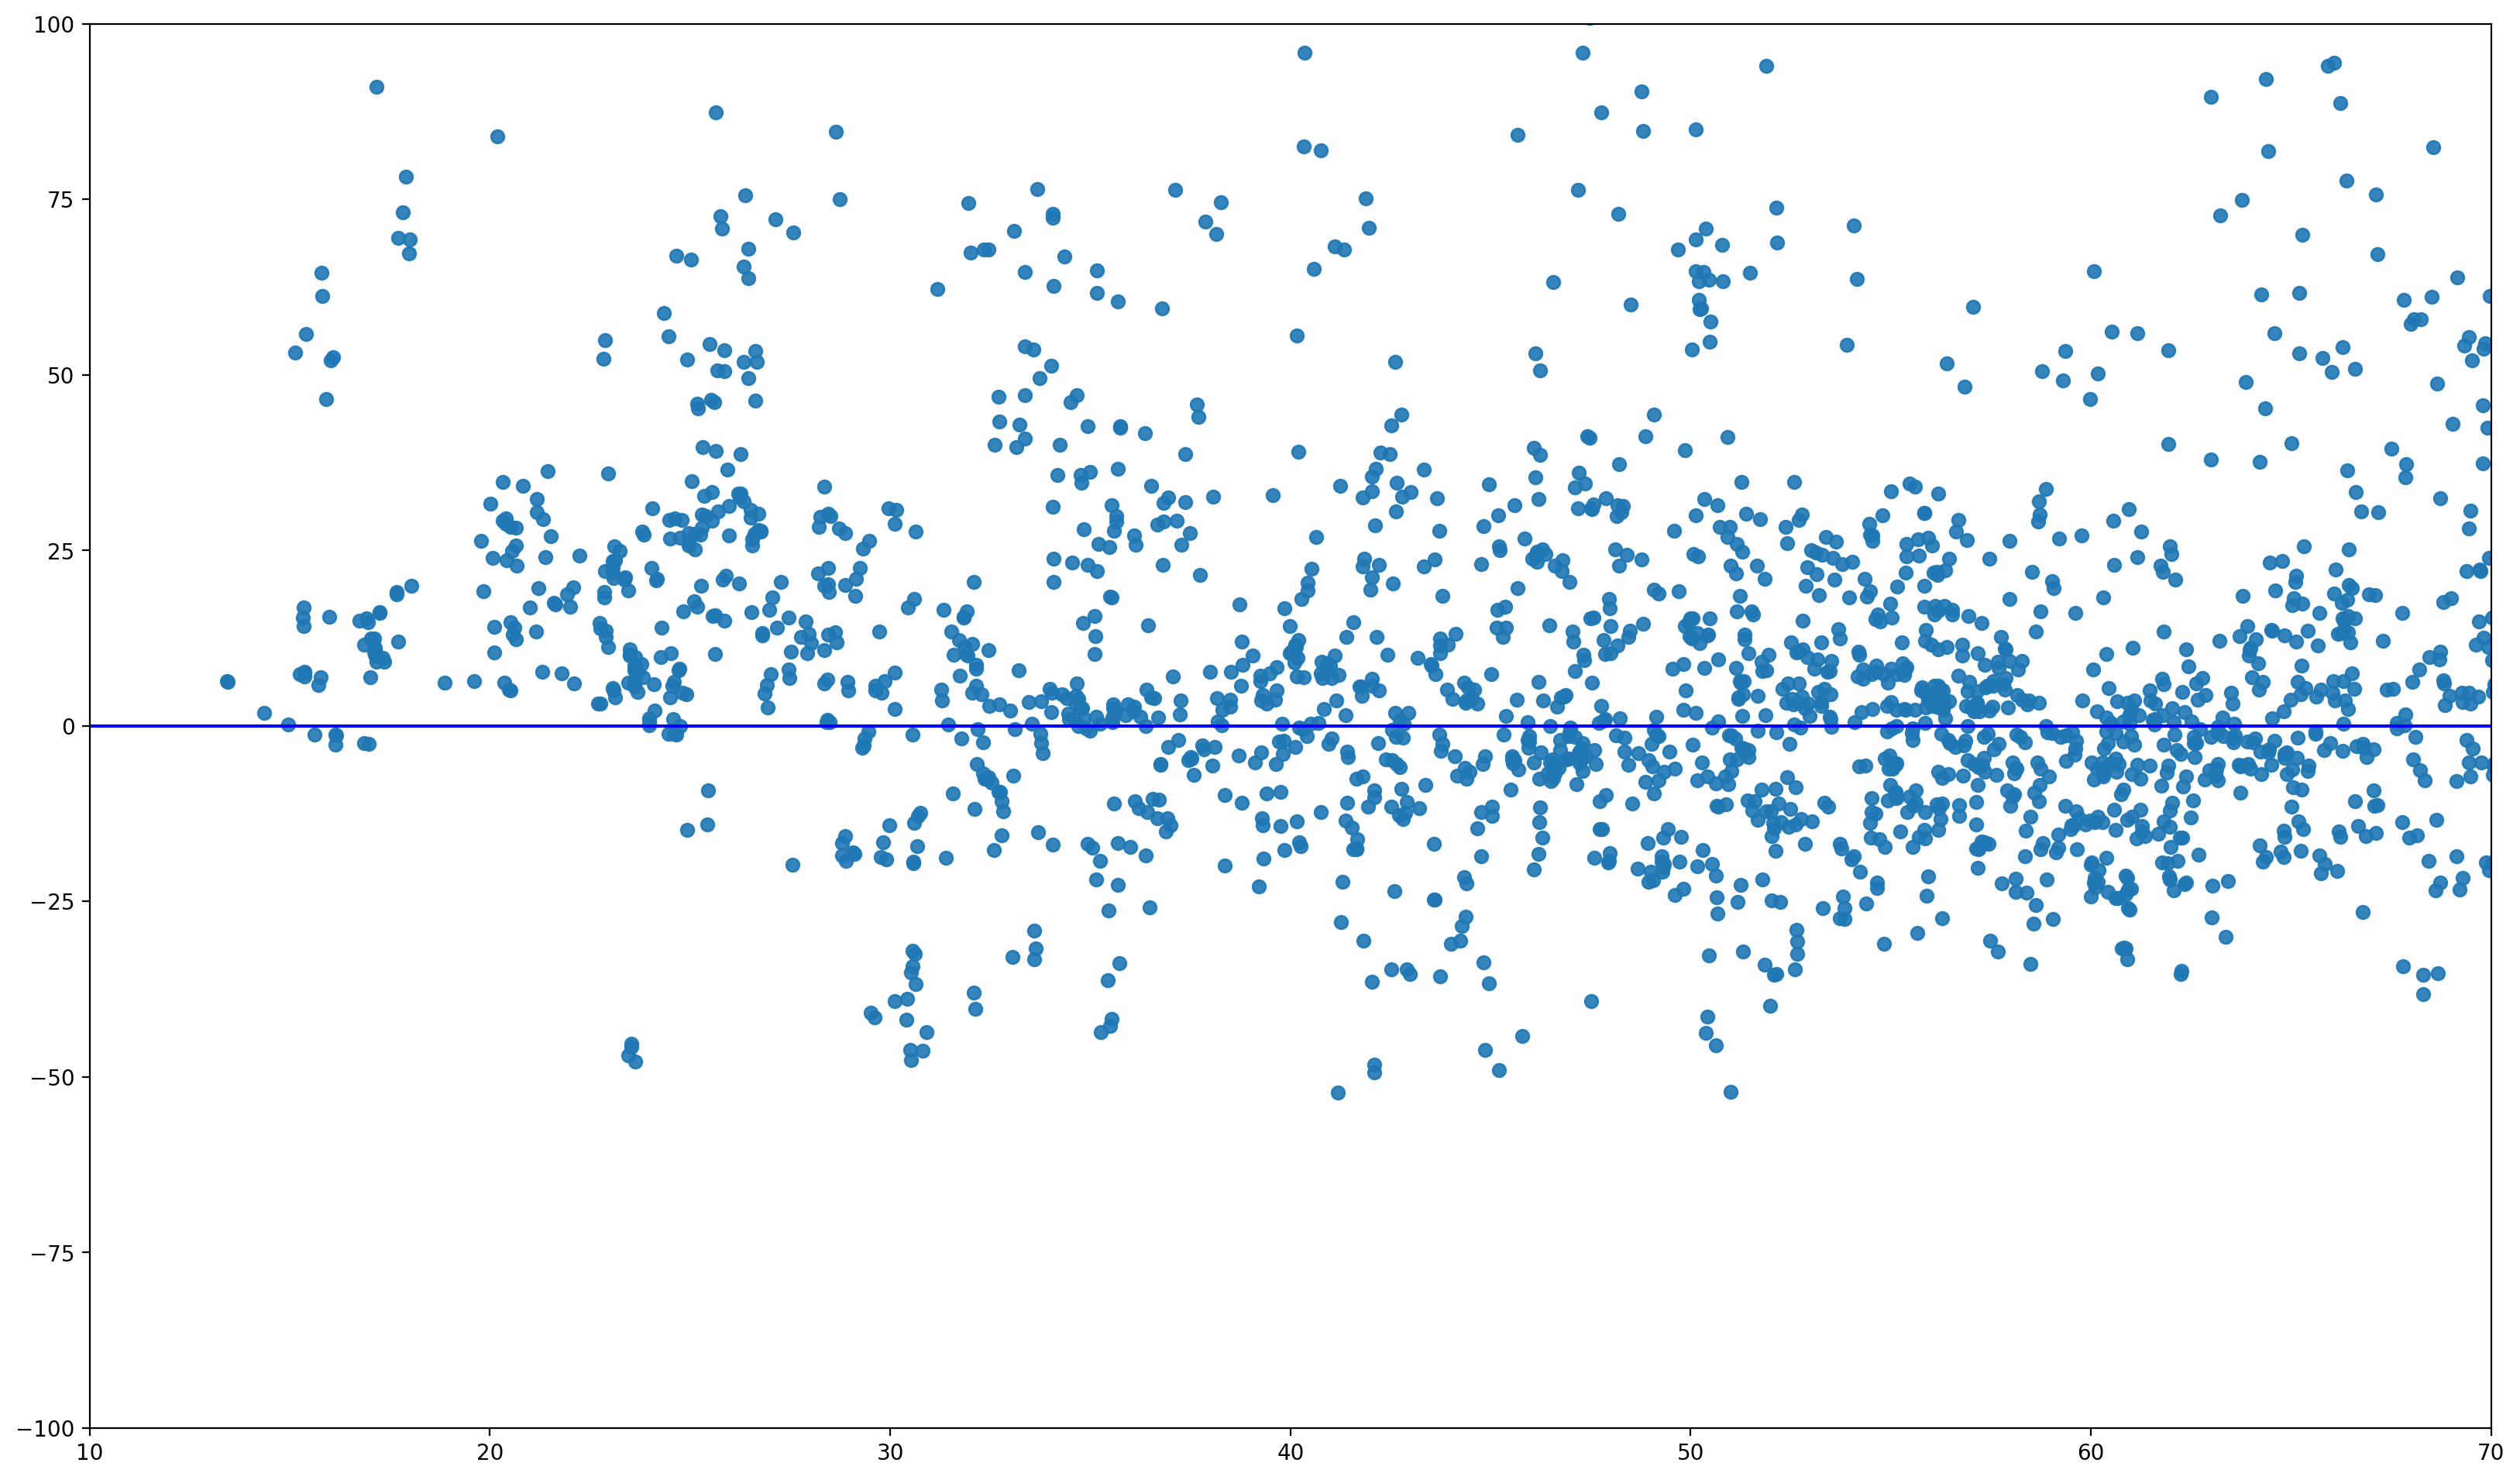

In [54]:
days_after = 30
df['price_after'] = df['close'].shift(-days_after)
y = df['return_after'] = ((df['price_after'] / df['close']) - 1) * 100
x = df['vol']
plt.figure(figsize=(20, 12), dpi=200)
plt.scatter(x, y, alpha=0.9)
axes = plt.gca()
axes.set_ylim([-100,100])
axes.set_xlim([10,70])
plt.axhline(0, color="blue")
plt.show()

In [36]:
df_sort = df.sort_values(by=['vol'])
df_sort

,close,open,high,low,change,vol,price_after,return_after
date,,,,,,,,
2016-10-21,630.45000,628.34000,633.2600,627.58000,0.003358,20.019395,728.5100,15.553969
2016-10-16,640.12000,637.03000,642.1800,636.39000,0.004851,20.147417,711.1000,11.088546
2016-10-20,628.34000,629.06000,630.8300,625.48000,-0.001145,20.180206,747.8900,19.026323
2016-10-19,629.06000,635.34000,637.2700,624.09000,-0.009884,20.204484,746.9600,18.742250
2016-10-17,637.37000,640.12000,641.2900,634.89000,-0.004296,20.205709,740.2800,16.146038
...,...,...,...,...,...,...,...,...
2010-09-10,0.06180,0.06111,0.0618,0.06014,0.011291,NaN,0.0965,56.148867
2010-09-11,0.06366,0.06180,0.0650,0.06190,0.030097,NaN,0.0950,49.230286
2010-09-12,0.06150,0.06366,0.0621,0.06150,-0.033930,NaN,0.0949,54.308943


In [37]:
# Show Log chart of Vol data

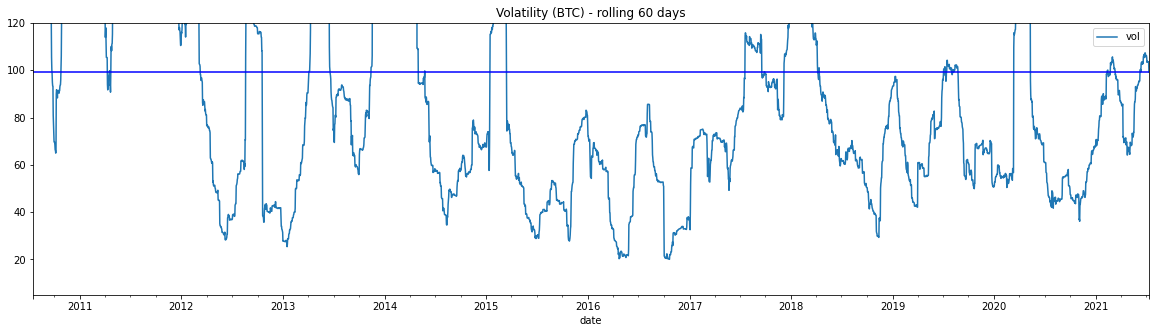

In [44]:
df[['vol']].plot(
                    kind='line', 
                    figsize=(20,5), 
                    title='Volatility ('+ticker.upper()+') - rolling '+str(vol_days)+' days')

axes = plt.gca()
axes.set_ylim([5,120])
plt.axhline(df['vol'][-1], color="blue")
plt.show()

In [39]:
# Number of total days
total = df.count().close
total

4014

In [40]:
# How many where lower the current level?
last_chg = df['vol'][-1]
df_lower = df.loc[df['vol'] < last_chg]
lower = df_lower.count().close
print ("Number of days where the vol was lower = " + str(lower))
print ("Percentage of total = " + str(lower / total * 100) + "%")

Number of days where the vol was lower = 2750
Percentage of total = 68.51021425012456%


In [41]:
# Filter the list for points that are in consecutive days
df_lower['n_days'] = df_lower.index
df_lower['diff'] = (df_lower['n_days'] - df_lower['n_days'].shift()).dt.days
df_lower = df_lower[df_lower['diff'] != 1]
df_lower

,close,open,high,low,change,vol,price_after,return_after,n_days,diff
date,,,,,,,,,,
2010-09-23,0.06231,0.0622,0.0630,0.0615,0.001768,98.464352,0.1055,69.314717,2010-09-23,NaN
2011-04-10,0.73690,0.7300,0.7589,0.7100,0.009452,94.013063,5.8100,688.438051,2011-04-10,168.0
2011-04-19,1.19800,1.1620,1.1980,1.1440,0.030981,93.775162,6.8050,468.030050,2011-04-19,2.0
2012-03-09,4.86100,4.9300,4.9490,4.8210,-0.013996,98.162886,4.7930,-1.398889,2012-03-09,322.0
2012-10-18,11.94000,11.8100,11.9600,11.7500,0.011008,74.553420,11.7900,-1.256281,2012-10-18,61.0
2013-06-19,108.25000,107.3500,110.9900,104.6600,0.008384,98.557898,92.0000,-15.011547,2013-06-19,77.0
2014-05-02,453.67000,460.1300,463.3800,442.0000,-0.014040,94.468695,649.7900,43.229660,2014-05-02,171.0
2014-05-26,582.01000,570.4400,586.4100,564.6500,0.020283,88.622914,568.4500,-2.329857,2014-05-26,2.0
2015-03-15,284.88000,281.6000,286.3900,280.3700,0.011648,99.082413,217.9900,-23.480062,2015-03-15,60.0


<AxesSubplot:xlabel='date'>

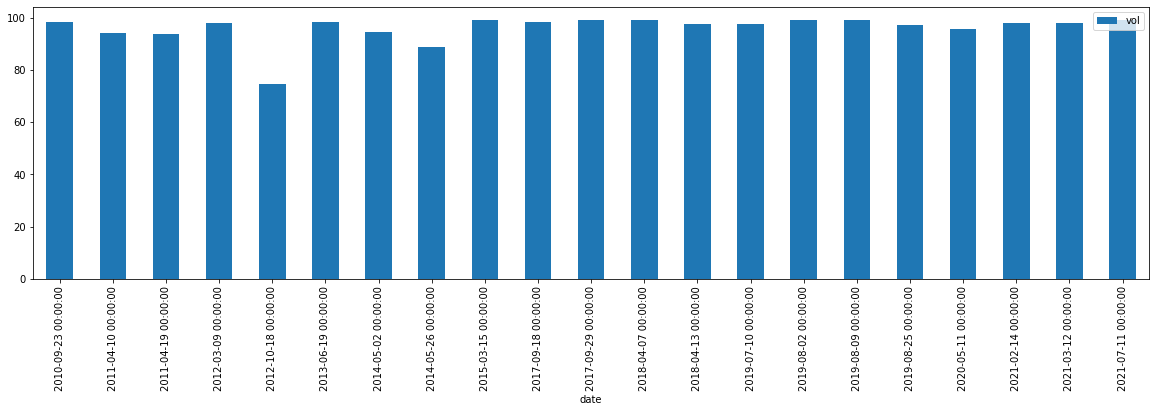

In [42]:
# Histogram of dates and returns
df_lower[['vol']].plot(
                    kind='bar', 
                    figsize=(20,5))

In [43]:
def find_price(date):
    price = df.loc[date]['close']
    return (price)
    
days_list = [10, 30, 90, 365]
cols = ['close']
for element in days_list:
    df_lower['date_after_' + str(element) + '_days'] = df_lower['n_days'] + pd.DateOffset(element)
    df_lower['price_after_' + str(element) + '_days'] = df_lower['date_after_' + str(element) + '_days'].apply(find_price)
    cols.append('price_after_' + str(element) + '_days')
    df_lower['return_after_' + str(element) + '_days'] = (df_lower['price_after_' + str(element) + '_days'] / df_lower['close']) - 1
    cols.append('return_after_' + str(element) + '_days')

df_lower[cols]

KeyError: Timestamp('2021-07-21 00:00:00')

In [ ]:
# Average results
for element in days_list:
    df_lower[['return_after_'+str(element)+'_days']].plot(
                    kind='bar', 
                    figsize=(20,5))


In [ ]:
# Summary for each date range
for element in days_list:
    print ('-------------------------------------------------------------')
    print ('Results for ' + str(element) + ' days')
    print ('average return = ' + str(df_lower[['return_after_'+str(element)+'_days']].mean()[0] * 100) + '%')
    print ('min return = ' + str(df_lower[['return_after_'+str(element)+'_days']].min()[0] * 100) + '%')
    print ('max return = ' + str(df_lower[['return_after_'+str(element)+'_days']].max()[0] * 100) + '%')